In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from simulation_configs import generateConfigurations
from simulation_modules import DisturbanceModule
import inspect

In [13]:
# Repeatable results
np.random.seed(100)

In [14]:
# Generate configurations
t, d, u, p, x, f, y, r, m, econ = generateConfigurations()

In [15]:
# Simulation time parameters
t

{'ndays': 16,
 'deltat': 1,
 'tmax': 1382400,
 'N': 1382400,
 'tvector': array([      0,       1,       2, ..., 1382398, 1382399, 1382400]),
 'i': 0}

In [16]:
# Disturbance parameters
d

{'mu': {'F0': 0.005, 'C0': 1.0},
 'sig': {'F0': 0.001, 'C0': 0.1},
 'phi': {'F0': 0.9, 'C0': 0.99}}

In [17]:
# Disturbance module
print(inspect.getsource(DisturbanceModule))

def DisturbanceModule(d,t):
    # Inputs:
    # d: dictionary with disturbance parameters 'mu', 'sig', 'phi' for each disturbance
    # t: dictionary with time vector 'tvector'
    # Outputs:
    # d_range: dictionary with disturbance range for each disturbance

    # Pre-allocate disturbance range dictionary
    d_range = {key:d['mu'][key]*np.ones(t['N']) for key in d['mu']}
    for i in range(1, t['N']):
        for key in d_range:
            d_range[key][i] = d['phi'][key]*d_range[key][i-1] \
                    + d['sig'][key]*np.sqrt(1-d['phi'][key]**2)*np.random.randn() \
                    + (1-d['phi'][key])*d['mu'][key]
    return d_range



In [18]:
# Generate disturbances
d_range = DisturbanceModule(d,t)

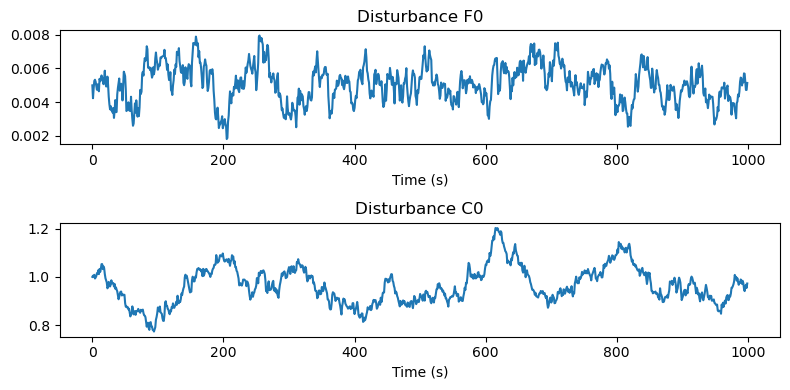

In [19]:
# Plotting
plot_window = range(0, 1000)
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].plot(t['tvector'][plot_window], d_range['F0'][plot_window])
ax[0].set_title('Disturbance F0')
ax[0].set_xlabel('Time (s)')
ax[1].plot(t['tvector'][plot_window], d_range['C0'][plot_window])
ax[1].set_title('Disturbance C0')
ax[1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()